# Analysis of transaction diffusion in memory pool

## Set up

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(ggraph, quietly=TRUE)
    require(igraph, quietly=TRUE)
    require(magrittr, quietly=TRUE)
    require(tidygraph, quietly=TRUE)
})

## Parameters

In [2]:
k <- 20
N <- 30000

## Extent of diffusion

### Mean number of hops

In [3]:
logb(N, k)

[1] 3.441213

### Standard devision of number of hops

In [4]:
pi / log(k) / sqrt(3)

[1] 0.6054611

### Recursion relation

In [5]:
hHi <- function(i) {
    if (i <= 0)
        list(h=1, H=1)
    else {
        prev <- hHi(i - 1)
        k1 <- k * (N - 2) / (N - 1)
        h <- (N - prev$H) * (1 - (1 - 1 / N)^(prev$h * k1))
        H <- prev$H + h
        list(h=h, H=H)
    }
}

Mean

In [6]:
mapply(function(i) i / N * hHi(i)$h, 0:10) %>% sum

[1] 3.74988

Diffusion at three or four hops.

In [7]:
hHi(3)$H / N

[1] 0.24318

In [8]:
hHi(4)$H / N

[1] 0.992277

### Approximation

In [9]:
Hest <- function(i)
    N / (1 + (N / 1 - 1) / (k - 1)^i)

### Comparision of methods

In [10]:
example <- CJ(i=0:7)[
    ,
    .(`Number of hops`=`i`, `Recursion`=mapply(function(i) hHi(i)$H,`i`), `Logistic`=mapply(Hest,`i`))
]
example

Number of hops,Recursion,Logistic
<int>,<dbl>,<dbl>
0,1.00000,1.00000
1,20.99234,18.98861
2,417.90171,356.71937
3,7295.39990,5582.77714
4,29768.30996,24386.41467
5,29999.99993,29640.88795
6,29999.99994,29980.88257
7,29999.99994,29998.99321


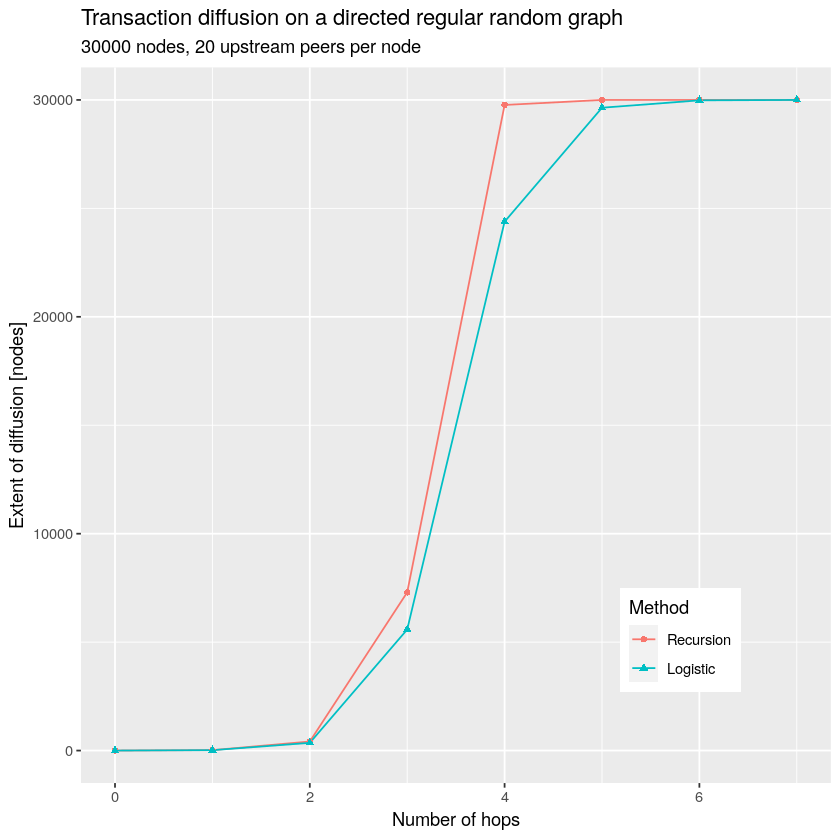

In [11]:
ggplot(
    melt(example, id.vars="Number of hops", variable.name="Method", value.name="Extent of diffusion [nodes]"),
    aes(x=`Number of hops`, y=`Extent of diffusion [nodes]`, color=`Method`, shape=`Method`)
) +
    geom_line() +
    geom_point() +
    ggtitle(
        "Transaction diffusion on a directed regular random graph",
        paste(N, "nodes,", k, "upstream peers per node")
    ) +
    theme(legend.position=c(0.8, 0.2))

In [12]:
ggsave("diffusion.png", units="in", dpi=150, width=8, height=6)

In [13]:
ggsave("diffusion.svg", units="in", dpi=150, width=8, height=6)